In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg as linalg
import scipy.spatial as spat
import matplotlib.patches as patches
import matplotlib.colors as colors
from scipy.spatial.distance import cdist
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

from multiprocessing import Pool
from functools import partial 

In [ ]:
from chern_functions import (haldane_chern_sweep, build_honeycomb, 
                            twisted_chern_sweep, find_eigvalues,
                            plot_betas, twisted_chern_c1_sweep, ABC_sections)

In [ ]:
PITCH = 4.2
deformed_lattice = np.array([[-16.8       ,  32.73576026],
       [-23.1       ,  21.82384018],
       [-16.8       ,  25.46114687],
       [-10.5       ,  29.09845357],
       [ -4.2       ,  32.73576026],
       [-29.4       ,  10.91192009],
       [-23.1       ,  14.54922678],
       [-16.8       ,  18.18653348],
       [-10.5       ,  21.82384018],
       [ -4.2       ,  25.46114687],
       [  2.1       ,  29.09845357],
       [  8.4       ,  32.73576026],
       [-35.7       ,   0.        ],
       [-29.4       ,   3.6373067 ],
       [-23.1       ,   7.27461339],
       [-16.8       ,  10.91192009],
       [-10.5       ,  14.54922678],
       [ -4.2       ,  18.18653348],
       [  2.1       ,  21.82384018],
       [  8.4       ,  25.46114687],
       [ 14.7       ,  29.09845357],
       [ 21.        ,  32.73576026],
       [-29.4       ,  -3.6373067 ],
       [-23.1       ,   0.        ],
       [-16.8       ,   3.6373067 ],
       [-10.5       ,   7.27461339],
       [ -4.2       ,  10.91192009],
       [  2.1       ,  14.54922678],
       [  8.4       ,  18.18653348],
       [ 14.7       ,  21.82384018],
       [ 21.        ,  25.46114687],
       [-29.4       , -10.91192009],
       [-23.1       ,  -7.27461339],
       [-16.8       ,  -3.6373067 ],
       [-10.5       ,   0.        ],
       [ -4.2       ,   3.6373067 ],
       [  2.1       ,   7.27461339],
       [  8.4       ,  10.91192009],
       [ 14.7       ,  14.54922678],
       [ 21.        ,  18.18653348],
       [ 27.3       ,  21.82384018],
       [-23.1       , -14.54922678],
       [-16.8       , -10.91192009],
       [-10.5       ,  -7.27461339],
       [ -4.2       ,  -3.6373067 ],
       [  2.1       ,   0.        ],
       [  8.4       ,   3.6373067 ],
       [ 14.7       ,   7.27461339],
       [ 21.        ,  10.91192009],
       [ 27.3       ,  14.54922678],
       [-23.1       , -21.82384018],
       [-16.8       , -18.18653348],
       [-10.5       , -14.54922678],
       [ -4.2       , -10.91192009],
       [  2.1       ,  -7.27461339],
       [  8.4       ,  -3.6373067 ],
       [ 14.7       ,   0.        ],
       [ 21.        ,   3.6373067 ],
       [ 27.3       ,   7.27461339],
       [ 33.6       ,  10.91192009],
       [-16.8       , -25.46114687],
       [-10.5       , -21.82384018],
       [ -4.2       , -18.18653348],
       [  2.1       , -14.54922678],
       [  8.4       , -10.91192009],
       [ 14.7       ,  -7.27461339],
       [ 21.        ,  -3.6373067 ],
       [ 27.3       ,   0.        ],
       [ 33.6       ,   3.6373067 ],
       [-16.8       , -32.73576026],
       [-10.5       , -29.09845357],
       [ -4.2       , -25.46114687],
       [  2.1       , -21.82384018],
       [  8.4       , -18.18653348],
       [ 14.7       , -14.54922678],
       [ 21.        , -10.91192009],
       [ 27.3       ,  -7.27461339],
       [ 33.6       ,  -3.6373067 ],
       [ -4.2       , -32.73576026],
       [  2.1       , -29.09845357],
       [  8.4       , -25.46114687],
       [ 14.7       , -21.82384018],
       [ 21.        , -18.18653348],
       [ 27.3       , -14.54922678],
       [ 33.6       , -10.91192009],
       [  8.4       , -32.73576026],
       [ 14.7       , -29.09845357],
       [ 21.        , -25.46114687],
       [ 27.3       , -21.82384018],
       [ 21.        , -32.73576026],
       [-21.        ,  25.46114687],
       [-14.7       ,  29.09845357],
       [ -8.4       ,  32.73576026],
       [-27.3       ,  14.54922678],
       [-21.        ,  18.18653348],
       [-14.7       ,  21.82384018],
       [ -8.4       ,  25.46114687],
       [ -2.1       ,  29.09845357],
       [  4.2       ,  32.73576026],
       [-33.6       ,   3.6373067 ],
       [-27.3       ,   7.27461339],
       [-21.        ,  10.91192009],
       [-14.7       ,  14.54922678],
       [ -8.4       ,  18.18653348],
       [ -2.1       ,  21.82384018],
       [  4.2       ,  25.46114687],
       [ 10.5       ,  29.09845357],
       [ 16.8       ,  32.73576026],
       [-33.6       ,  -3.6373067 ],
       [-27.3       ,   0.        ],
       [-21.        ,   3.6373067 ],
       [-14.7       ,   7.27461339],
       [ -8.4       ,  10.91192009],
       [ -2.1       ,  14.54922678],
       [  4.2       ,  18.18653348],
       [ 10.5       ,  21.82384018],
       [ 16.8       ,  25.46114687],
       [ 23.1       ,  29.09845357],
       [-27.3       ,  -7.27461339],
       [-21.        ,  -3.6373067 ],
       [-14.7       ,   0.        ],
       [ -8.4       ,   3.6373067 ],
       [ -2.1       ,   7.27461339],
       [  4.2       ,  10.91192009],
       [ 10.5       ,  14.54922678],
       [ 16.8       ,  18.18653348],
       [ 23.1       ,  21.82384018],
       [-27.3       , -14.54922678],
       [-21.        , -10.91192009],
       [-14.7       ,  -7.27461339],
       [ -8.4       ,  -3.6373067 ],
       [ -2.1       ,   0.        ],
       [  4.2       ,   3.6373067 ],
       [ 10.5       ,   7.27461339],
       [ 16.8       ,  10.91192009],
       [ 23.1       ,  14.54922678],
       [ 29.4       ,  18.18653348],
       [-21.        , -18.18653348],
       [-14.7       , -14.54922678],
       [ -8.4       , -10.91192009],
       [ -2.1       ,  -7.27461339],
       [  4.2       ,  -3.6373067 ],
       [ 10.5       ,   0.        ],
       [ 16.8       ,   3.6373067 ],
       [ 23.1       ,   7.27461339],
       [ 29.4       ,  10.91192009],
       [-21.        , -25.46114687],
       [-14.7       , -21.82384018],
       [ -8.4       , -18.18653348],
       [ -2.1       , -14.54922678],
       [  4.2       , -10.91192009],
       [ 10.5       ,  -7.27461339],
       [ 16.8       ,  -3.6373067 ],
       [ 23.1       ,   0.        ],
       [ 29.4       ,   3.6373067 ],
       [ 35.7       ,   7.27461339],
       [-14.7       , -29.09845357],
       [ -8.4       , -25.46114687],
       [ -2.1       , -21.82384018],
       [  4.2       , -18.18653348],
       [ 10.5       , -14.54922678],
       [ 16.8       , -10.91192009],
       [ 23.1       ,  -7.27461339],
       [ 29.4       ,  -3.6373067 ],
       [ 35.7       ,   0.        ],
       [ -8.4       , -32.73576026],
       [ -2.1       , -29.09845357],
       [  4.2       , -25.46114687],
       [ 10.5       , -21.82384018],
       [ 16.8       , -18.18653348],
       [ 23.1       , -14.54922678],
       [ 29.4       , -10.91192009],
       [ 35.7       ,  -7.27461339],
       [  4.2       , -32.73576026],
       [ 10.5       , -29.09845357],
       [ 16.8       , -25.46114687],
       [ 23.1       , -21.82384018],
       [ 29.4       , -18.18653348],
       [ 16.8       , -32.73576026],
       [ 23.1       , -29.09845357]])


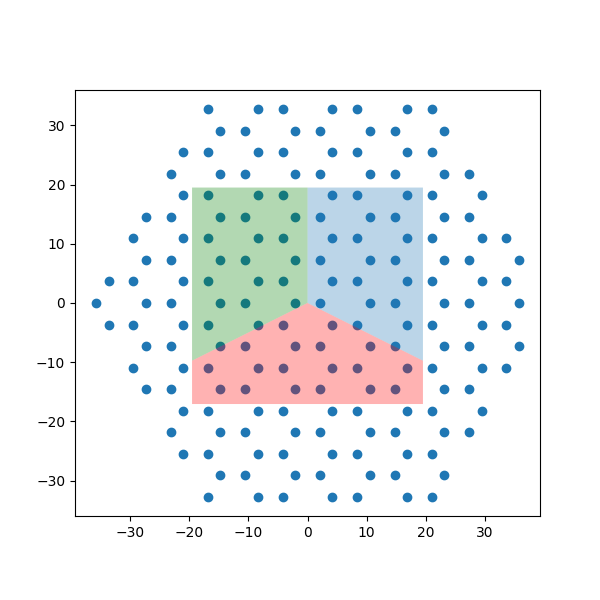

In [4]:
fig_lattice = plt.figure(figsize=(6,6))
ax_lattice = fig_lattice.add_subplot(111)

ax_lattice.scatter(deformed_lattice[:,0], deformed_lattice[:,1])
a_s, b_s, c_s = ABC_sections(19.5)
ax_lattice.add_patch(a_s)
ax_lattice.add_patch(b_s)
ax_lattice.add_patch(c_s)
ax_lattice.set_aspect('equal')
plt.show()

# print(repr(deformed_lattice))

c:\Users\nr421\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


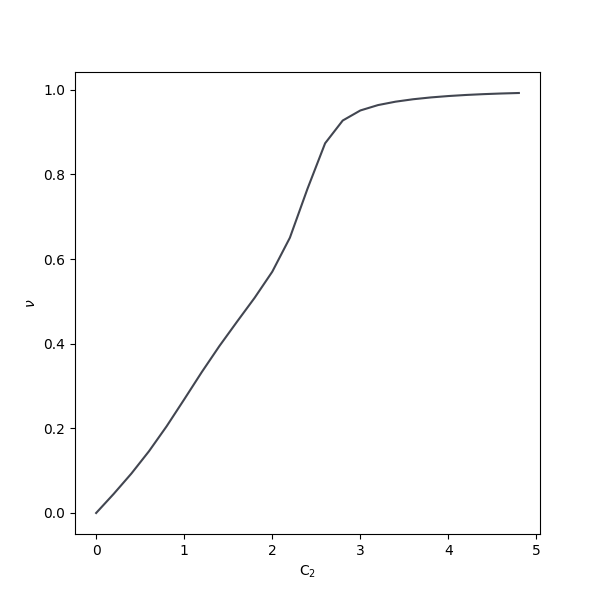

In [7]:
partial_chern_func = partial(haldane_chern_sweep, point_list=deformed_lattice, pitch=4.2, c1=30, onsite=0.0, starting_band=94, selection_size=18)


c2_list = np.arange(0,5,0.2)
with Pool() as mp_pool:
    chern_vals_hald = mp_pool.map(partial_chern_func, c2_list)


# chern_vals = []
# for i in np.arange(0.0,10.0,1):
    # haldane_vals, haldane_vecs = find_eigvalues_haldane(b_10_list, 4.2, 30, i, 0.0)
    # chern_vals.append(real_space_chern_calc(b_10_list, haldane_vecs, 640, 38))
    
fig_chern_change = plt.figure(figsize=(6,6))
ax_chern_change = fig_chern_change.add_subplot(111)
ax_chern_change.plot(c2_list, chern_vals_hald, color='#424651')
ax_chern_change.set_ylabel(r'$\nu$')
ax_chern_change.set_xlabel('$\mathrm{C_2}$')
# fig_chern_change.savefig('haldane_model_c2.svg', dpi=300)
plt.show()

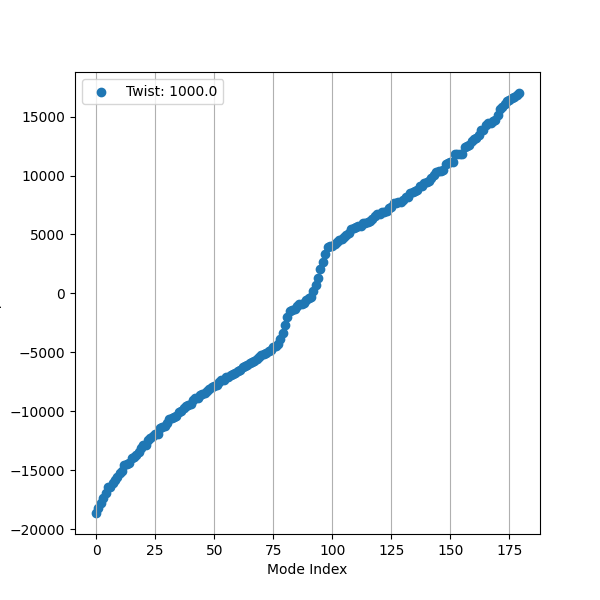

In [5]:
twist = 1000
beta_straight = 5876619.5
beta_vals_1, beta_vecs_1 = find_eigvalues(deformed_lattice, 4.2, 6000, beta_straight, twist)
plot_betas(beta_vals_1, 'Twist: {:.1f}'.format(twist))

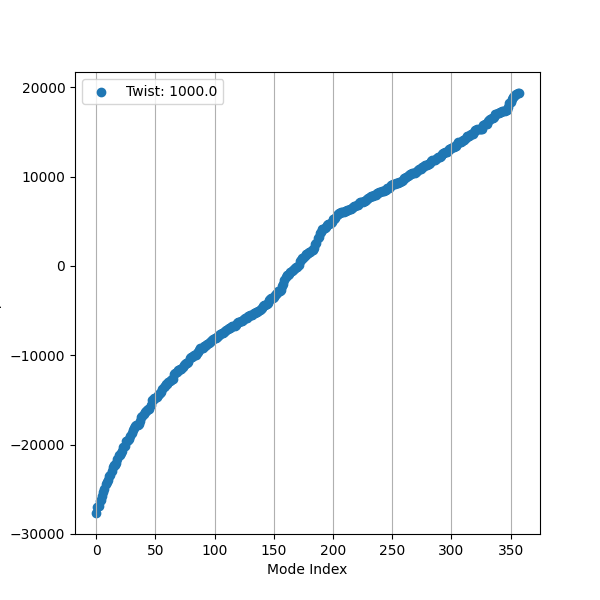

In [11]:
comsol_df = pd.read_csv('../COMSOL/Data/Honeycomb/Doped Glass/honeycomb 4.2 pitch 1000 twist different z.csv', header=4)
five_cm_df = comsol_df[comsol_df['% z_dist (m)'] == 0.05]
fourty_three_cm_df = comsol_df[comsol_df['% z_dist (m)'] == 0.43]

five_cm_props = five_cm_df['Propagation constant (rad/m)']
plot_betas(five_cm_props, 'Twist: {:.1f}'.format(twist))

[-1.45964388e-19  4.94759700e-18  2.91681156e-18 -4.99680702e-18
  6.61061278e-19  5.09067858e-18  3.96540876e-18 -3.24891797e-18
  6.31990797e-18  9.40438505e-19 -1.17746595e-17 -3.53844558e-19
 -1.01503398e-17 -3.02681791e-18 -1.65719972e-18  7.48568578e-18
 -6.75291402e-18 -2.58004023e-19  4.03173707e-19  2.91462576e-18
 -7.42078023e-18  3.58158617e-18 -6.68607020e-18 -1.60170272e-18
 -6.39854616e-18 -1.05531403e-17 -5.71966909e-18 -1.35913014e-18
 -7.66127494e-18  2.10632993e-17  7.72519624e-20  1.62831961e-17
  5.92872329e-18 -1.60130269e-18 -1.27971060e-17  8.84744560e-18
 -1.06863475e-17  6.84466995e-18  1.41913103e-17  2.32121251e-17
 -7.58967751e-19  2.29731365e-18  1.48968652e-17  1.44665624e-18
  8.05206422e-18  5.87145221e-18  7.80847012e-18 -5.63000834e-19
  2.91476414e-18 -1.68908699e-17]


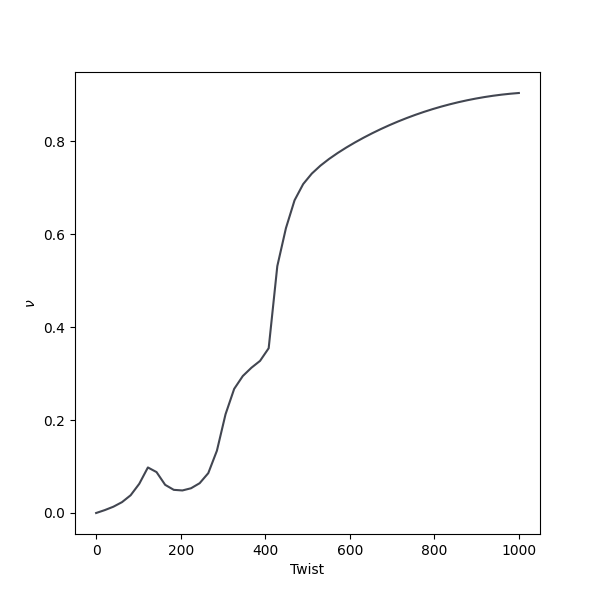

In [8]:
partial_twist_chern_func = partial(twisted_chern_sweep, point_list=deformed_lattice, pitch=4.2, c1=5250,
                                   beta_straight=beta_straight, starting_band=96, selection_size=18)


twist_list = np.linspace(0,1000,50)
with Pool() as mp_pool:
    chern_vals = mp_pool.map(partial_twist_chern_func, twist_list)


# chern_vals = []
# for i in np.arange(0.0,10.0,1):
    # haldane_vals, haldane_vecs = find_eigvalues_haldane(b_10_list, 4.2, 30, i, 0.0)
    # chern_vals.append(real_space_chern_calc(b_10_list, haldane_vecs, 640, 38))

fig_chern_change_twist = plt.figure(figsize=(6,6))
ax_chern_change_twist = fig_chern_change_twist.add_subplot(111)
ax_chern_change_twist.plot(twist_list, np.real(chern_vals), color='#424651')
ax_chern_change_twist.set_ylabel(r'$\nu$')
ax_chern_change_twist.set_xlabel('Twist')
# fig_chern_change_twist.savefig('twisted_fibre_chern.svg', dpi=300)
plt.show()

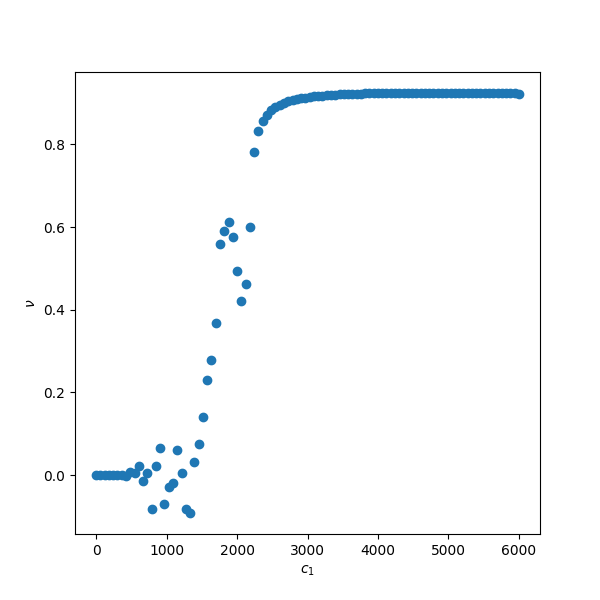

In [6]:
partial_c1_chern_func = partial(twisted_chern_c1_sweep, point_list=deformed_lattice, pitch=4.2, twist=1000,
                                   beta_straight=beta_straight, starting_band=94, selection_size=19)


c1_list = np.linspace(0,6000,100)
with Pool() as mp_pool:
    chern_vals_c1 = mp_pool.map(partial_c1_chern_func, c1_list)

# chern_vals = []
# for i in np.arange(0.0,10.0,1):
    # haldane_vals, haldane_vecs = find_eigvalues_haldane(b_10_list, 4.2, 30, i, 0.0)
    # chern_vals.append(real_space_chern_calc(b_10_list, haldane_vecs, 640, 38))
    
fig_chern_change_c1 = plt.figure(figsize=(6,6))
ax_chern_change_c1 = fig_chern_change_c1.add_subplot(111)
ax_chern_change_c1.scatter(c1_list, np.real(chern_vals_c1))
ax_chern_change_c1.set_ylabel(r'$\nu$')
ax_chern_change_c1.set_xlabel(r'$c_1$')
plt.show()

In [46]:

coupling_list_2 = np.arange(0,6000,50)
twist_list_for_heatmap = np.arange(0.0,1200,10)

array_for_plotting = np.zeros((len(coupling_list_2), len(twist_list_for_heatmap)))

for num in range(len(coupling_list_2)):
    partial_twist_chern_func_in_loop = partial(twisted_chern_sweep, point_list=deformed_lattice, pitch=4.2, c1=coupling_list_2[num],
                                   beta_straight=beta_straight, starting_band=94, selection_size=18.5)
    with Pool() as mp_pool:
        chern_vals_loop = mp_pool.map(partial_twist_chern_func_in_loop, twist_list_for_heatmap)
    array_for_plotting[num,:] = np.real(chern_vals_loop)




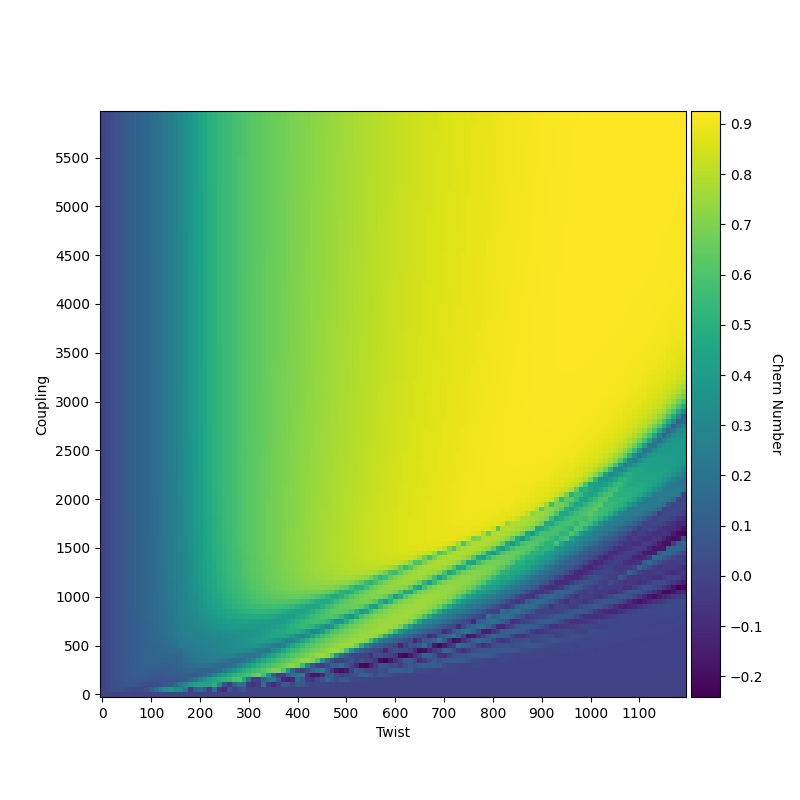

In [50]:

from mpl_toolkits.axes_grid1 import make_axes_locatable

heatmap_fig = plt.figure(figsize=(8,8))
heatmap_ax = heatmap_fig.add_subplot(111)
# twood_array = np.reshape(threed_array,(25,3))


# XX,YY = np.meshgrid(twood_array[:,1],twood_array[:,2])

im = heatmap_ax.imshow(array_for_plotting, interpolation="nearest")

# print(coupling_list_2)
# print(twist_list_for_heatmap)
heatmap_ax.set_yticks(np.arange(len(coupling_list_2))[::10])
heatmap_ax.set_xticks(np.arange(len(twist_list_for_heatmap))[::10])
heatmap_ax.set_xticklabels(['{:.0f}'.format(i) for i in twist_list_for_heatmap[::10]])
heatmap_ax.set_yticklabels(['{:.0f}'.format(i) for i in coupling_list_2[::10]])
heatmap_ax.set_xlabel('Twist')
heatmap_ax.set_ylabel('Coupling')
heatmap_ax.invert_yaxis()
heatmap_ax.set_aspect('equal')
# ax = plt.gca()

divider = make_axes_locatable(heatmap_ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = heatmap_ax.figure.colorbar(im, ticks=np.arange(-0.2, 1.1, 0.1), cax=cax)
cbar.ax.set_ylabel('Chern Number', rotation=-90, va="bottom")
heatmap_fig.savefig('../Twisted Fibre/heatmap_comsol_10ring_very_fine.svg', dpi=600)
plt.show()